<a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_5_Coordinate_Reference_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F1_Introduction_to_Geospatial_Data%2FGY5021_5_Coordinate_Reference_Systems.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>

<img src="https://raw.githubusercontent.com/bamacgabhann/GY5021/2024/PD_logo.png" align=center alt="UL Geography logo"/>

# Coordinate Reference Systems

In the Vector Data and Attribute Data notebooks, we looked at some examples of vector data with points, lines, and polygons - but most of the examples used simple made-up integer coordinates. But we also used one example in the Attribute Data notebook which used coordinates looking more real, each with two six-figure numbers. But what type of coordinates are these?

Of course, this raises some further questions. Are there different kinds of coordinates? How can we tell the difference? And how do we make sure that all our data is using the same type of coordinates, or at least is plotted together in the right place on a map?

To explore and understand this, I'm going to use some code which I'm not really going to explain until the bottom of this notebook. So you might want to go through it a second time.

The problem with maps is that the Earth is round - while maps are flat.

It is impossible to unfold a round shape like the Earth onto a flat surface without distorting at least one of shapes, areas, distances, and angles. Simply can't be done. 

This means that every map you'll ever see is wrong, in some way. No flat map can every be completely accurate.

There are a few different ways of creating flat maps of round surfaces. The most basic way is to make the lines of longitude - the lines running from the North pole to the South pole - parallel. Of course, they aren't parallel in reality: they meet at the poles, and are spaced furthest apart at the equator.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Latitude_and_Longitude_of_the_Earth.svg/652px-Latitude_and_Longitude_of_the_Earth.svg.png' />

But we can show them parallel on a map, plotting latitude and longitude as X and Y coordinates.

## 1. The Plate Carree Projection

In [15]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [67]:
land = gpd.read_file('https://github.com/bamacgabhann/GY5021/raw/2024/GY5021/1_Introduction_to_Geospatial_Data/sample_data/land.gpkg')
ocean = gpd.read_file('https://github.com/bamacgabhann/GY5021/raw/2024/GY5021/1_Introduction_to_Geospatial_Data/sample_data/ocean.gpkg')
grid = gpd.read_file('https://github.com/bamacgabhann/GY5021/raw/2024/GY5021/1_Introduction_to_Geospatial_Data/sample_data/LatLongGrid.gpkg')
circles = gpd.read_file('https://github.com/bamacgabhann/GY5021/raw/2024/GY5021/1_Introduction_to_Geospatial_Data/sample_data/tissot.gpkg')
world = gpd.read_file('https://github.com/bamacgabhann/GY5021/raw/2024/GY5021/1_Introduction_to_Geospatial_Data/sample_data/WorldBorders.gpkg')

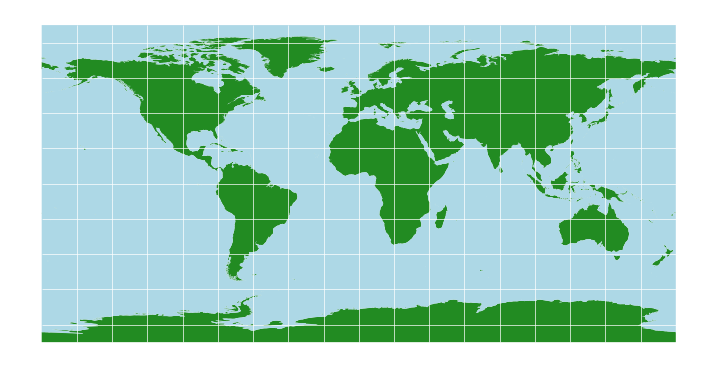

In [18]:
land_pc = land.to_crs(4326)
ocean_pc = ocean.to_crs(4326)
grid_pc = grid.to_crs(4326)

fig, ax = plt.subplots(figsize = (9,6))

land_pc.plot(ax=ax, color='forestgreen')
ocean_pc.plot(ax=ax, color='lightblue')
grid_pc.plot(ax=ax, color='white', linewidth=0.5)

ax.axis('off')

plt.show()

Obviously, this massively stretches the areas closer to the poles - they're shown to be the same size as the equator, which is clearly not the case.

This is the simplest map projection. It's also one of the worst, because of the various properties - shapes, areas, distances, and angles - it preserves *none* of them. We can see that if we add some 750km circles to the map:

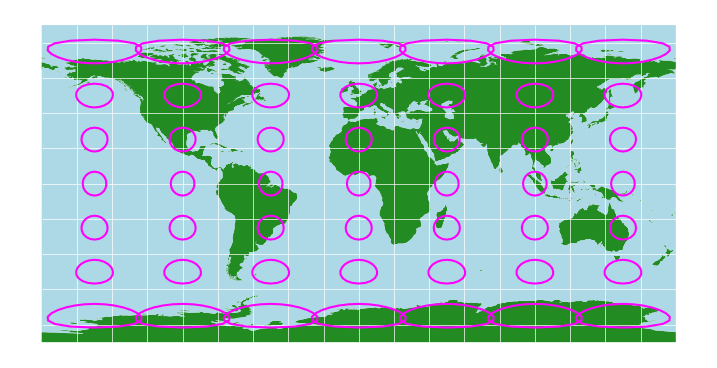

In [19]:
circles_pc = circles.to_crs(4326)

fig, ax = plt.subplots(figsize = (9,6))
land_pc.plot(ax=ax, color='forestgreen')
ocean_pc.plot(ax=ax, color='lightblue')
grid_pc.plot(ax=ax, color='white', linewidth=0.5)
circles_pc.boundary.plot(ax=ax, color='fuchsia')

ax.axis('off')

plt.show()

## 2. The Mercator Projection

In the 16th century, Flemish geographer Gerardus Mercator presented a new map of the world. His map aimed to be useful for sailors navigating by compass, and the priority for this use case is to preserve angles. His map therefore applied an equal amount of north-south stretching as east-west stretching. It's known now as the Mercator projection, and it's probably the world map you're used to seeing.

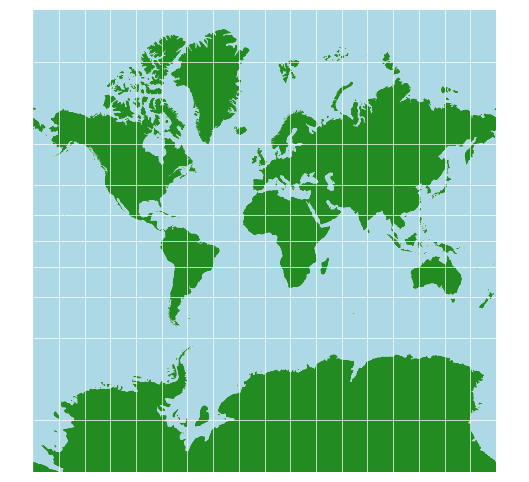

In [20]:
land_merc = land.to_crs(crs='+proj=merc')
ocean_merc = ocean.to_crs(crs='+proj=merc')
grid_merc = grid.to_crs(crs='+proj=merc')

fig, ax = plt.subplots(figsize = (9,6))

land_merc.plot(ax=ax, color='forestgreen')
ocean_merc.plot(ax=ax, color='lightblue')
grid_merc.plot(ax=ax, color='white', linewidth=0.5)

ax.set_ylim(-20000000, 20000000)
ax.axis('off')

plt.show()

With the circles:

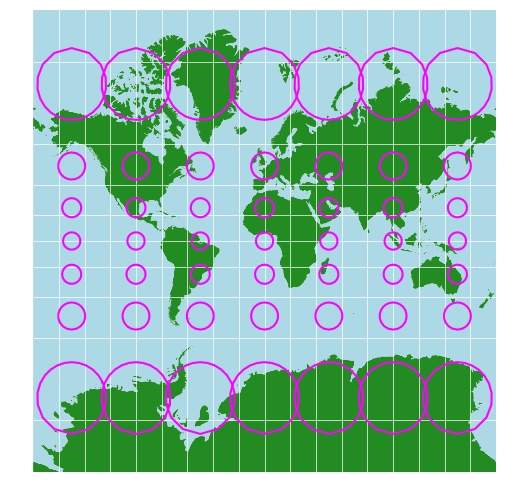

In [21]:
circles_merc = circles.to_crs(crs='+proj=merc')

fig, ax = plt.subplots(figsize = (9,6))

land_merc.plot(ax=ax, color='forestgreen')
ocean_merc.plot(ax=ax, color='lightblue')
grid_merc.plot(ax=ax, color='white', linewidth=0.5)
circles_merc.boundary.plot(ax=ax, color='fuchsia')

ax.set_ylim(-20000000, 20000000)
ax.axis('off')

plt.show()

Here you can see the power of the Mercator projection - the circles are all circles. They get bigger towards the poles, but they aren't distorted, and that means you can use compass directions to navigate with this map.

However, the inflation of size does distort reality quite significantly. Greenland looks far bigger than Africa, when in fact it's over 10 times smaller. 

There's a great clip from [The West Wing](https://www.youtube.com/watch?v=OH1bZ0F3zVU) which explains some of the issues with this. Europe, the USA, Canada, Russia, and China are all inflated, while India, the Middle East, Africa, and South America are generally not. You can't help but notice the distinction between the developed and developing world there.

One alternative, mentioned in that clip, is the Gall-Peters projection.

## 3. The Gall-Peters Projection

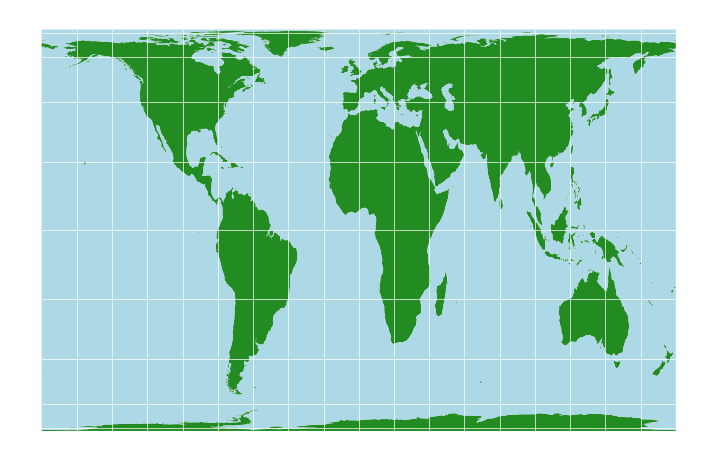

In [22]:
land_gp = land.to_crs(crs='+proj=cea +lon_0=0 +x_0=0 +y_0=0 +lat_ts=45 +ellps=WGS84 +datum=WGS84 +units=m +no_defs')
ocean_gp = ocean.to_crs(crs='+proj=cea +lon_0=0 +x_0=0 +y_0=0 +lat_ts=45 +ellps=WGS84 +datum=WGS84 +units=m +no_defs')
grid_gp = grid.to_crs(crs='+proj=cea +lon_0=0 +x_0=0 +y_0=0 +lat_ts=45 +ellps=WGS84 +datum=WGS84 +units=m +no_defs')

fig, ax = plt.subplots(figsize = (9,6))

land_gp.plot(ax=ax, color='forestgreen')
ocean_gp.plot(ax=ax, color='lightblue')
grid_gp.plot(ax=ax, color='white', linewidth=0.5)

ax.axis('off')

plt.show()

With the circles:

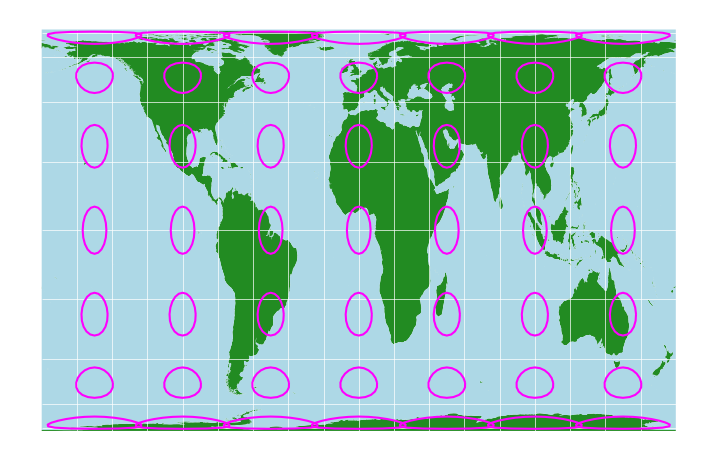

In [23]:
circles_gp = circles.to_crs(crs='+proj=cea +lon_0=0 +x_0=0 +y_0=0 +lat_ts=45 +ellps=WGS84 +datum=WGS84 +units=m +no_defs')

fig, ax = plt.subplots(figsize = (9,6))

land_gp.plot(ax=ax, color='forestgreen')
ocean_gp.plot(ax=ax, color='lightblue')
grid_gp.plot(ax=ax, color='white', linewidth=0.5)
circles_gp.boundary.plot(ax=ax, color='fuchsia')

ax.axis('off')

plt.show()

Clearly the circles are deformed here, so, there's no using this map for navigation.

However, you might notice that all the circles are roughly the same size. That's what this map does: it's an *equal area* map. Look at the relative sizes of Africa and Greenland - that's the real size comparison. The shapes are deformed, but in some ways this is a much better view of the world.

Neither map is correct, though. As I said, no map can be. They're both useful in different contexts. but both also have major flaws.

## 4. The Mollweide Projection

There have been numerous attempts to make other map projections. Wikipedia actually has a [pretty good list](https://en.wikipedia.org/wiki/List_of_map_projections). 

These are known as *cylindrical* projections. You can think of them like there being a projector light in the centre of the Earth, projecting the Earth's surface onto the surface of a cylinder which is touching Earth at the Equator.

One variation on this is the Mollweide projection, which is pseudocyclindrical. It's an equal-area projection:

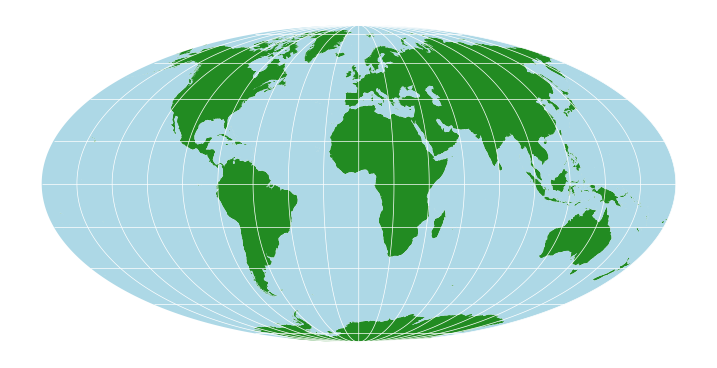

In [24]:
land_moll = land.to_crs(crs='+proj=moll')
ocean_moll = ocean.to_crs(crs='+proj=moll')
grid_moll = grid.to_crs(crs='+proj=moll')

fig, ax = plt.subplots(figsize = (9,6))

land_moll.plot(ax=ax, color='forestgreen')
ocean_moll.plot(ax=ax, color='lightblue')
grid_moll.plot(ax=ax, color='white', linewidth=0.5)

ax.axis('off')

plt.show()

Adding the circles:

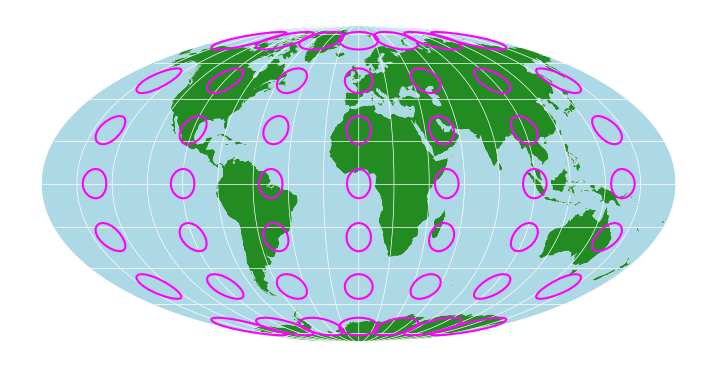

In [25]:
circles_moll = circles.to_crs(crs='+proj=moll')

fig, ax = plt.subplots(figsize = (9,6))

land_moll.plot(ax=ax, color='forestgreen')
ocean_moll.plot(ax=ax, color='lightblue')
grid_moll.plot(ax=ax, color='white', linewidth=0.5)
circles_moll.boundary.plot(ax=ax, color='fuchsia')

ax.axis('off')

plt.show()

Again look at Africa and Greenland for relative sizes. Obviously the circles are deformed, so no navigation, but similar sizes are maintained by not showing the world as a rectangle. 

This is the map projection on which you'll normally see global data like sea surface temperatures. 

## 5. Conical Projections: Albers and Lambert

It's also possible to project the Earth's surface onto other shapes. One is a cone: imagine a conical hat sitting on top of the Earth.

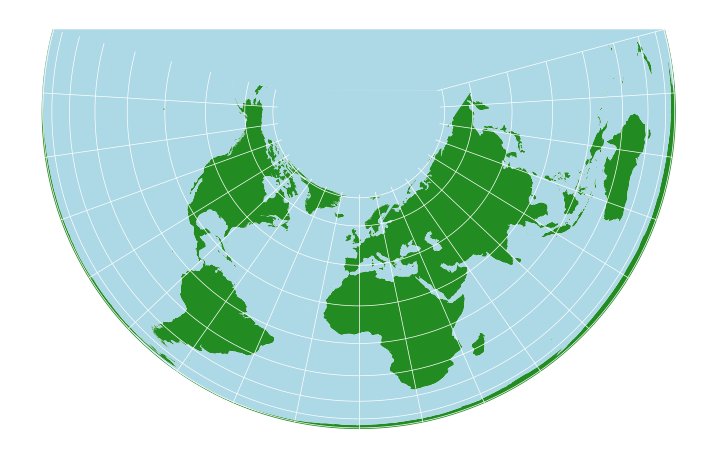

In [26]:
land_alb = land.to_crs(crs='+proj=aea +lat_1=29.5 +lat_2=42.5')
ocean_alb = ocean.to_crs(crs='+proj=aea +lat_1=29.5 +lat_2=42.5')
grid_alb = grid.to_crs(crs='+proj=aea +lat_1=29.5 +lat_2=42.5')

fig, ax = plt.subplots(figsize = (9,6))

land_alb.plot(ax=ax, color='forestgreen')
ocean_alb.plot(ax=ax, color='lightblue')
grid_alb.plot(ax=ax, color='white', linewidth=0.5)

ax.axis('off')

plt.show()

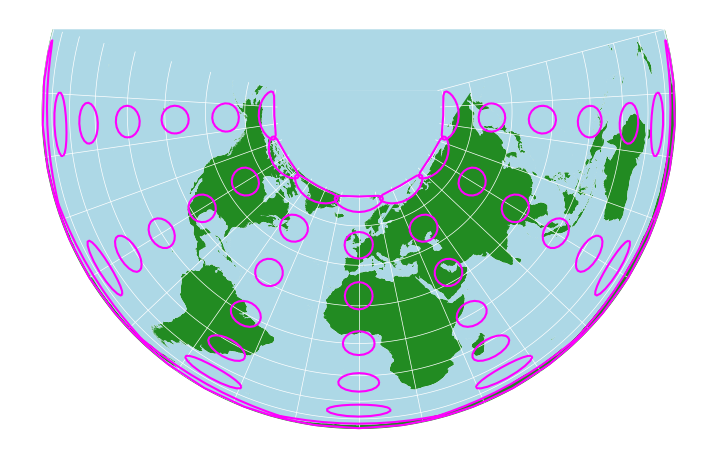

In [27]:
circles_alb = circles.to_crs(crs='+proj=aea +lat_1=29.5 +lat_2=42.5')

fig, ax = plt.subplots(figsize = (9,6))

land_alb.plot(ax=ax, color='forestgreen')
ocean_alb.plot(ax=ax, color='lightblue')
grid_alb.plot(ax=ax, color='white', linewidth=0.5)
circles_alb.boundary.plot(ax=ax, color='fuchsia')

ax.axis('off')

plt.show()

Very strange looking, but if you take a closer look at the USA - this is the standard map projection you'll see for maps of the United States, the Albers equal area projection. 

We can use a North America-centred version, and set the map to only show the area covering the continental US:

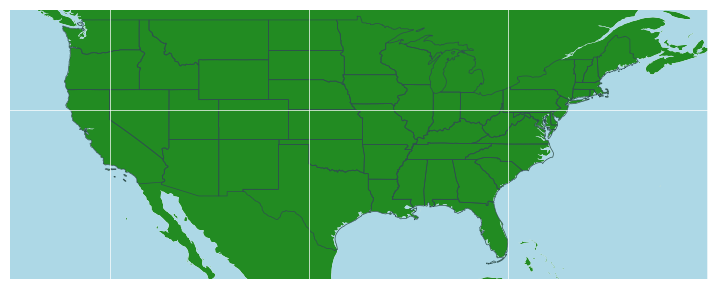

In [37]:
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip')

usa_alb_us = usa.to_crs(4269)
land_alb_us = land.to_crs(4269)
ocean_alb_us = ocean.to_crs(4269)
grid_alb_us = grid.to_crs(4269)

fig, ax = plt.subplots(figsize = (9,6))

land_alb_us.plot(ax=ax, color='forestgreen')
ocean_alb_us.plot(ax=ax, color='lightblue')
usa_alb_us.boundary.plot(ax=ax, linewidth=0.5, color='darkslategrey')
grid_alb_us.plot(ax=ax, color='white', linewidth=0.5)

ax.axis('off')
ax.set_xlim(-130, -60)
ax.set_ylim(23, 50)

plt.show()

A different conic projection, the Lambert Azimuthal Equal Area projection, is commonly used for Europe:

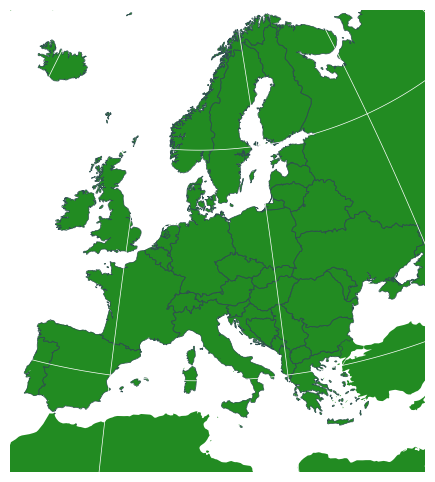

In [112]:
europe = world[world['continent']=='Europe'].to_crs(3035)
land_lam = land.to_crs(3035)
grid_lam = grid.to_crs(3035)

fig, ax = plt.subplots(figsize = (9,6))

land_lam.plot(ax=ax, color='forestgreen')
europe.boundary.plot(ax=ax, linewidth=0.5, color='darkslategrey')
grid_lam.plot(ax=ax, color='white', linewidth=0.5)

ax.axis('off')
ax.set_xlim(2500000, 6500000)
ax.set_ylim(1000000, 5450000)

plt.show()

You might recognise that map from your Euro notes and coins - it's the standard map projection used by the EU.



## 6. The Irish Transverse Mercator Projection

You'll notice we've gone from global maps to continental maps. We can go even more local. Let's look at Ireland in some different projections. 

Lambert:

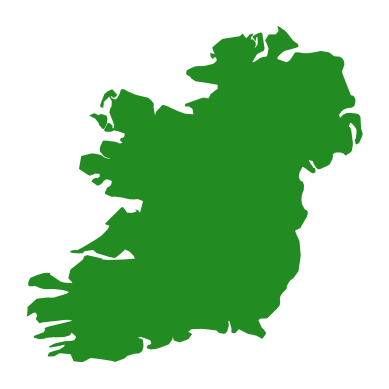

In [118]:
ireland_laea = world[world['name']=='Ireland'].to_crs(3035)
fig, ax = plt.subplots()
ireland_laea.plot(ax=ax, color='forestgreen')
ax.axis('off')
plt.show()

Gall-Peters:

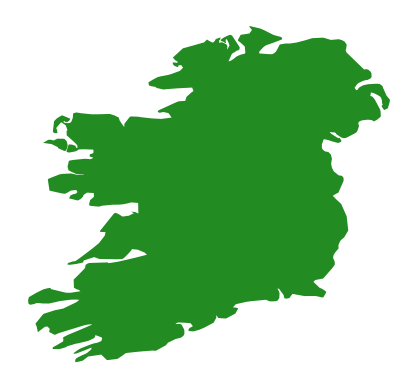

In [119]:
ireland_gallpeters = world[world['name']=='Ireland'].to_crs(crs='+proj=cea +lon_0=0 +x_0=0 +y_0=0 +lat_ts=45 +ellps=WGS84 +datum=WGS84 +units=m +no_defs')
fig, ax = plt.subplots()
ireland_gallpeters.plot(ax=ax, color='forestgreen')
ax.axis('off')
plt.show()

Mercator:

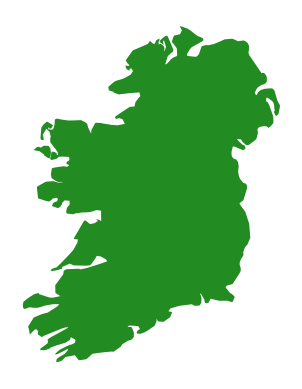

In [120]:
ireland_mercator = world[world['name']=='Ireland'].to_crs(crs='+proj=merc')
fig, ax = plt.subplots()
ireland_mercator.plot(ax=ax, color='forestgreen')
ax.axis('off')
plt.show()

Some differences there. So, which of them is the best map projection to use for Ireland?

None of them. Ireland, like many other countries, uses a specific map projection and coordinate system which has been designed to show Ireland with as little distortion as possible. Ours is called the Irish Transverse Mercator projection, or ITM for short:

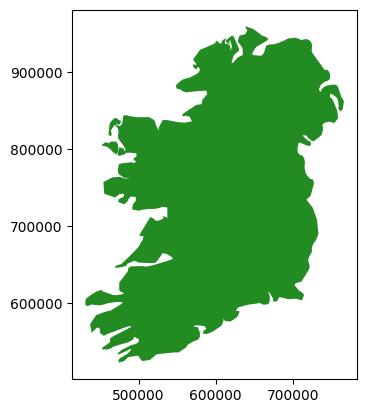

In [121]:
ireland_itm = world[world['name']=='Ireland'].to_crs(2157)
fig, ax = plt.subplots()
ireland_itm.plot(ax=ax, color='forestgreen')
plt.show()

Notice the numbers around the map there. The general coordinate system used globally is latitude and longitude, measured in degrees, minutes, and seconds north or south of the equator, and east or west of the Greenwitch Meridian. That's the most useful system for global use, but it has a disadvantage in that 360 degrees around the lines of latitude varies from zero at the poles, to the full circumference of the planet around the equator. In other words, a degree is a measurement of angle from the centre of the Earth, but it's *not* a consistent measure of distance.

The numbers around that last map of Ireland aren't in degrees. They're in metres. The ITM projection has been defined as a grid in metres. This makes it extremely useful for local work - if you have two coordinates, you can tell how far apart they are in metres simply by subtracting the numbers. It makes calculating distances and areas much easier. It is the preferred coordinate system for Ireland, and should be used for virtually all maps of Ireland.

## 8. Coordinate Reference Systems in Python

The mathematical definitions of these map projections are known as *coordinate reference systems*. 

You don't have to learn them all, don't worry. What's important is two things:

1. Being aware of different projections, so that you can choose a good one for whatever data you want to use.
2. Making sure your data is in the right map projection.

Which one to use is going to be fairly straightforward, honestly, even though it sounds complicated. Does your map only show part of Ireland? Then use ITM. Does it show only part of another country? Then find that country's system. Europe-wide? LAEA. Global? Mercator if you're showing routes, like shipping or flights, Gall-Peters if you're showing area-density numbers like population density, availability of healthcare etc., and Mollweide if you're showing a global dataset like surface temperature.

The main thing is going to be ensuring that all your data is in the right coordinate reference system. You might have some data from the CSO using ITM, a base map from Google in Mercator, some EPA data in the old Irish Grid (the system used before ITM. It's been defunct for 20 years, but still some people use it, I don't know what to tell you), and some European data in LAEA. You need to get it all into the same system, so that you can most effectively use all the data together.

In Python, pyproj is a package which is designed to handle coordinate reference systems. 

<img src="https://pyproj4.github.io/pyproj/stable/_static/logo.png" style="height:60px" alt="pyproj logo"/>

Like NumPy, it is written in C, so although it's called from python, all the computation is done at a compiled level, meaning it's fast.

pyproj can interpret references to a CRS in numerous different formats. From the pyproj documentation (https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS.from_user_input):

 - PROJ string  
 - Dictionary of PROJ parameters 
 - PROJ keyword arguments for parameters  
 - JSON string with PROJ parameters  
 - CRS WKT string  
 - An authority string, e.g. ```'epsg:4326'```  
 - An EPSG integer e.g. ```'4326'```  
 - A tuple of (“auth_name”: “auth_e.g.”) e.g. ```('epsg',   '4326')```  
 - An object with a ```to_wkt``` method  
 - A ```pyproj.crs.CRS``` class 

pyproj allows for the definition of custom coordinate reference systems, and as per the list above, can essentially handle any pre-defined crs. It also facilitates transformations between coordinate reference systems. 

You've just seen me do that a bunch - and I used PROJ strings, PROJ parameters, and EPSG codes to do the transformations. Look back through them all, and you'll see.

QGIS also uses PROJ, as does every open source geospatial tool I know. I'm not sure what ArcGIS Pro uses, but either way, in both QGIS and ArcGIS it is equally possible to reproject layers into different coordinate reference systems, and save layers in different systems.

Again - don't memorise any of this. Knowing that all of this exists is the important part: just look up what you need, when you need it. If something's important enough to memorise, you'll be using it enough to remember it.

Of course, because geospatial data should ideally have the coordinate reference system information saved, this means we need some particular file types for geospatial data. In the next Notebook, we'll look at some different types of files for storing and using geospatial data.

___

Week 1 Notebooks: 

1. Geospatial Software and Programming Languages <a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_1_Geospatial_Software_and_Programming_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F1_Introduction_to_Geospatial_Data%2FGY5021_1_Geospatial_Software_and_Programming_Languages.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>

2. Data Types <a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_2_Data_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F1_Introduction_to_Geospatial_Data%2FGY5021_2_Data_Types.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>

3. Vector Data <a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_3_Vector_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F1_Introduction_to_Geospatial_Data%2FGY5021_3_Vector_Data.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>

4. Attribute Data <a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_4_Attribute_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F1_Introduction_to_Geospatial_Data%2FGY5021_4_Attribute_Data.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>

5. Coordinate Reference Systems <a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_5_Coordinate_Reference_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F1_Introduction_to_Geospatial_Data%2FGY5021_5_Coordinate_Reference_Systems.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>

6. Geospatial Data Files <a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_6_Geospatial_Data_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F1_Introduction_to_Geospatial_Data%2FGY5021_6_Geospatial_Data_Files.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>

7. Vector Geoprocessing <a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_7_Vector_Geoprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F1_Introduction_to_Geospatial_Data%2FGY5021_7_Vector_Geoprocessing.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>

Additional:

- The Python Language <a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_The_Python_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F1_Introduction_to_Geospatial_Data%2FGY5021_The_Python_Language.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>

- Getting Started Seriously With Python <a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/1_Introduction_to_Geospatial_Data/GY5021_Getting_Started_Seriously_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F1_Introduction_to_Geospatial_Data%2FGY5021_Getting_Started_Seriously_With_Python.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>